In [9]:
# Analysis of Air Quality during The Covid19 Pandemic

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.cloud import bigquery
import requests

In [12]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/home/jovyan/notebooks/CMSC320FinalProject-235d97f10aa6.json"

In [ ]:
# Introduction 
'''
On December 31st 2019, Wuhan Municipal Health Commision, China, reported a cluster of pneumonia cases in 
Wuhan Province. This led to the discovery of a novel coronavirus strain, which would eventually become known 
as COVID-19. January 13th 2020, a mere two weeks later, Thailand reports the first case of COVID-19 outside 
of China; the beginnings of a global pandemic. Fast forward only two months later to March 11th, COVID-19 is 
officially classified as a pandemic, a disease prevalent all over the world. To put this into perspective, 
the last highly deadly pandemic was in 1918, the novel H1N1 flu virus, or “Spanish Flu.” The rise of COVID-19 
is the first time in a century where a virus threatened human life to this extent.

COVID-19 has an extensive list of symptoms, including but not limited to: fever, nausea, diarrhea, loss of 
taste and smell, but most notably difficulty breathing. COVID-19 causes pneumonia, a condition where the lungs 
are filled with fluid and inflamed, making it difficult to breath. As COVID-19 pneumonia worsens, it eventually 
leads to lung failure, and potentially death. Ironically, while COVID-19 makes it incredibly difficult for 
humans to breathe, the resulting global pandemic has allowed our planet Earth to breathe freely. 

With the threat of COVID-19, most countries began implementing extensive quarantine policies on its citizens, 
causing work and school to move online. With more people at home than ever before, and fewer people are in 
their cars and power plants, air pollution has reportedly dropped a significant amount around the globe. 
In the United States, quarantining is largely organized by individual states. This leads to some states, 
when controlling for population, having more cases of COVID-19 than other states. Using the data from a google 
service called BigQuery, we will investigate how the number of COVID-19 cases, and quarantine has affected the 
quality of air across different states in the United States. 
'''

In [102]:
# Data Collection:
# Covid-19 Data Collection:
'''
In the Data Collection stage of the Data Lifecycle, we will focus on fetching data from a Google service called
BigQuery. BigQuery provides public datasets for any Google Cloud user. Once the desired data is retrieved, we will
insert that data into a dataframe for later use.

The first set of data needed is the data on the number of confirmed Covid19 cases in the United States. 
'''

In [13]:
client = bigquery.Client()
date_range = ''
date_range += '_4_30_20, '
for i in range(1, 31):
    date_range += '_5_%d_20, ' % i
date_range += '_5_31_20'
QUERY = ('SELECT state, %s FROM `bigquery-public-data.covid19_usafacts.confirmed_cases` ' % date_range)
#query_job = client.query(QUERY)
#rows = query_job.result()
raw_cases = pd.read_gbq(QUERY, project_id="cmsc320finalproject",dialect='standard')
raw_cases

Downloading: 100%|██████████| 3195/3195 [00:01<00:00, 2217.64rows/s]


,state,_4_30_20,_5_1_20,_5_2_20,_5_3_20,_5_4_20,_5_5_20,_5_6_20,_5_7_20,_5_8_20,...,_5_22_20,_5_23_20,_5_24_20,_5_25_20,_5_26_20,_5_27_20,_5_28_20,_5_29_20,_5_30_20,_5_31_20
0,AL,886,929,946,969,992,1020,1048,1065,1094,...,1498,1576,1614,1630,1645,1673,1715,1744,1780,1826
1,AZ,3972,4156,4421,4585,4751,4929,5138,5196,5525,...,7950,8177,8277,8379,8448,8627,8896,9112,9522,9937
2,AR,168,160,178,174,163,163,145,153,154,...,144,148,150,159,174,181,193,193,196,188
3,CA,1603,1636,1705,1749,1776,1809,1863,1917,1961,...,2708,2767,2847,2874,2986,3049,3097,3195,3289,3390
4,CA,891,907,934,945,947,969,985,999,1014,...,1259,1296,1321,1336,1353,1375,1384,1404,1426,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,WA,45,47,53,53,59,60,62,62,64,...,71,72,72,73,73,73,73,73,73,73
3191,VA,56,56,56,56,59,61,61,61,61,...,67,69,69,69,69,70,72,73,73,77
3192,VA,49,51,55,55,55,58,58,63,65,...,104,108,108,108,122,129,129,129,134,134
3193,GA,57,59,59,59,60,61,64,64,65,...,93,95,95,99,102,107,113,118,118,119


In [29]:
# Data Collection:
# Airnow Air Quality Data:


# Use Airnow API to collect Air Quality data for each state in the United States for May 2020.
# Collect Data in batches since the AirNow API limits to 500 requests and range queries don't seem to work.

# Sample of ZIP codes for each state since the AirNow API needs a zip code to retrieve data. 
sample_zip_codes = {
    'AL' : '36104', 
    'AK' : '99801', 
    'AZ' : '85001',
    'AR' : '72201',
    'CA' : '95814',
    'CO' : '80202',
    'CT' : '06103',
    'DE' : '19901',
    'FL' : '32301',
    'GA' : '30303',
    'HI' : '96813',
    'ID' : '83702',
    'IL' : '62701',
    'IN' : '46225',
    'IA' : '50309',
    'KS' : '66603',
    'KY' : '40601',
    'LA' : '70802',
    'ME' : '04330',
    'MD' : '21401',
    'MA' : '02201',
    'MI' : '48933',
    'MN' : '55102',
    'MS' : '39205',
    'MO' : '65101',
    'MT' : '59623',
    'NE' : '68502',
    'NV' : '89701',
    'NH' : '03301',
    'NJ' : '08608',
    'NM' : '87501',
    'NY' : '12207',
    'NC' : '27601',
    'ND' : '58501',
    'OH' : '43215',
    'OK' : '73102',
    'OR' : '97301',
    'PA' : '17101',
    'RI' : '02903',
    'SC' : '29217',
    'SD' : '57501',
    'TN' : '37219',
    'TX' : '78701',
    'UT' : '84111',
    'VT' : '05602',
    'VA' : '23219',
    'WA' : '98507',
    'WV' : '25301',
    'WI' : '53703',
    'WY' : '82001',
    'DC' : '20001'
}

def hist_airnow_api_call(zip_code, date, distance):
    built_call = 'http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=%s&date=%sT00-0000&distance=50&API_KEY=%s' % (zip_code, date, api_key)
    result = requests.get(built_call)    
    if result.status_code == 200:
        return pd.DataFrame(result.json())
    else:
        return pd.DataFrame()
    
def get_may_data(start_index):
    return_df = pd.DataFrame()
    date = '2020-05-%s'
    counter = 0
    
    for zip_code in sample_zip_codes.values():
        for day_date in range(1,32):
            if counter >= start_index
                gen_date = date % str(day_date).rjust(2, '0')
                gen_df = hist_airnow_api_call(zip_code, gen_date, '50')
                return_df = return_df.append(gen_df, ignore_index=True)
            counter += 1
            
    return return_df

# raw_data1 = get_may_data(0)
# raw_data2 = get_may_data(500)
# raw_data3 = get_may_data(1000)

# Write data to local CSV files for easier processing:

# raw_data1.to_csv('raw_data_1.csv', encoding='utf-8', index=False)
# raw_data2.to_csv('raw_data_2.csv', encoding='utf-8', index=False)
# raw_data3.to_csv('raw_data_3.csv', encoding='utf-8', index=False)

df1 = pd.read_csv("raw_data_1.csv")
df2 = pd.read_csv("raw_data_2.csv")
# df3 = pd.read_csv("raw_data_3.csv")

merged_air_now_may = df1.append(df2, ignore_index=True)
# merged_air_now_may = merged_air_now_may.append(df2, ignore_index=True)
merged_air_now_may

,DateObserved,HourObserved,LocalTimeZone,ReportingArea,StateCode,Latitude,Longitude,ParameterName,AQI,Category
0,2020-05-01,0,AKT,Juneau,AK,58.3000,-134.4167,PM2.5,33,"{'Number': 1, 'Name': 'Good'}"
1,2020-05-01,0,AKT,Juneau,AK,58.3000,-134.4167,PM10,9,"{'Number': 1, 'Name': 'Good'}"
2,2020-05-02,0,AKT,Juneau,AK,58.3000,-134.4167,PM2.5,45,"{'Number': 1, 'Name': 'Good'}"
3,2020-05-02,0,AKT,Juneau,AK,58.3000,-134.4167,PM10,13,"{'Number': 1, 'Name': 'Good'}"
4,2020-05-03,0,AKT,Juneau,AK,58.3000,-134.4167,PM2.5,7,"{'Number': 1, 'Name': 'Good'}"
...,...,...,...,...,...,...,...,...,...,...
1960,2020-05-24,0,EST,Concord,NH,43.2069,-71.5342,OZONE,35,"{'Number': 1, 'Name': 'Good'}"
1961,2020-05-25,0,EST,Concord,NH,43.2069,-71.5342,OZONE,26,"{'Number': 1, 'Name': 'Good'}"
1962,2020-05-26,0,EST,Concord,NH,43.2069,-71.5342,OZONE,43,"{'Number': 1, 'Name': 'Good'}"
1963,2020-05-27,0,EST,Concord,NH,43.2069,-71.5342,OZONE,46,"{'Number': 1, 'Name': 'Good'}"


In [14]:
# Data Processing:
'''
In the Data Processing stage of the Data Lifecycle, we will organize and narrow down the data we want to use for
our analysis. In the BigQuery Covid19 Confirmed Cases dataset, the data goes all the way back to January 22, 2020
and is still collecting and publishing data. To simplify our analysis we will focus on data that was
collected from May 1, 2020 to May 31, 2020.
The first dataframe we will reference throughout the project is the raw data with only the date filtering. This means
that the data will be seperated by State and County.
The second dataframe will be filtered by date and grouped by States. Each state will have the sum of all the covid19
cases added for that particular date. 
The third dataframe will be filtered the same way as before, but now it will be the total covid19 cases for all
of the United States for each particular date in May.
The fourth and fifth dataframes will be the same as the second and third respectively, but instead of total number
of cases for each date, it will be new number of cases for each date. 
'''

by_state = raw_cases.groupby(['state'], as_index=False).sum()
by_state

,state,_4_30_20,_5_1_20,_5_2_20,_5_3_20,_5_4_20,_5_5_20,_5_6_20,_5_7_20,_5_8_20,...,_5_22_20,_5_23_20,_5_24_20,_5_25_20,_5_26_20,_5_27_20,_5_28_20,_5_29_20,_5_30_20,_5_31_20
0,AK,356,365,366,369,371,372,373,375,378,...,404,408,408,409,411,412,425,430,434,460
1,AL,7063,7294,7611,7885,8110,8436,8691,9046,9384,...,13670,14152,14507,15194,15648,16029,16553,17031,17358,17849
2,AR,3269,3304,3358,3417,3461,3522,3607,3692,3745,...,5610,5772,5920,6028,6177,6277,6531,6776,7010,7252
3,AZ,7648,7961,8364,8640,8919,9304,9706,9944,10526,...,15607,16039,16339,16560,16782,17261,17763,18465,19255,20119
4,CA,50322,52253,53696,54947,56191,58752,60701,62373,64567,...,90778,92664,94449,96673,99851,101877,104014,106651,110136,112703
5,CO,15261,15766,16224,16624,16902,17364,17830,18371,18827,...,23485,23954,24157,24248,24542,24766,25121,25612,26098,26378
6,CT,27700,28764,29287,29287,29973,30621,30995,31783,32411,...,39640,40022,40465,40873,41234,41288,41559,41762,42022,42201
7,DC,4323,4658,4797,5016,5170,5322,5461,5654,5899,...,7893,7966,8110,8225,8334,8406,8492,8538,8717,8801
8,DE,4734,4918,5038,5208,5288,5371,5778,5939,6111,...,8529,8690,8809,8965,9066,9096,9171,9236,9422,9498
9,FL,33690,34725,35460,36078,36892,37429,38001,38828,39196,...,49447,50127,50866,51745,52254,52633,53285,54496,55421,56161


In [15]:
all_us = by_state.drop(['state'], axis=1)
all_us = pd.DataFrame({'date': all_us.sum().index, 'cases':all_us.sum().values})
all_us

,date,cases
0,_4_30_20,1063314
1,_5_1_20,1096406
2,_5_2_20,1126378
3,_5_3_20,1151544
4,_5_4_20,1173202
5,_5_5_20,1197324
6,_5_6_20,1220975
7,_5_7_20,1248587
8,_5_8_20,1275974
9,_5_9_20,1301552


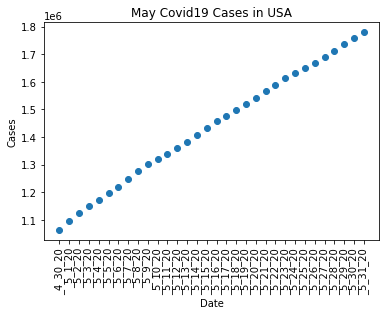

In [16]:
date = all_us['date']
cases = all_us['cases']

plt.plot(date, cases, 'o')
plt.title('May Covid19 Cases in USA')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Cases')
plt.show()

In [17]:
def new_cases_per_day_calc(row):
    prev_temp = row['_5_1_20']
    row['_5_1_20'] = prev_temp - row['_4_30_20']
    
    for i in range(2, 32):
        curr_date = '_5_%d_20' % i
        prev_date = '_5_%d_20' % (i - 1)
        curr_temp = row[curr_date]
        row[curr_date] = curr_temp - prev_temp
        prev_temp = curr_temp

    return row

cases_per_day = raw_cases.apply(lambda row: new_cases_per_day_calc(row), axis=1)
cases_per_day

,state,_4_30_20,_5_1_20,_5_2_20,_5_3_20,_5_4_20,_5_5_20,_5_6_20,_5_7_20,_5_8_20,...,_5_22_20,_5_23_20,_5_24_20,_5_25_20,_5_26_20,_5_27_20,_5_28_20,_5_29_20,_5_30_20,_5_31_20
0,AL,886,43,17,23,23,28,28,17,29,...,29,78,38,16,15,28,42,29,36,46
1,AZ,3972,184,265,164,166,178,209,58,329,...,115,227,100,102,69,179,269,216,410,415
2,AR,168,-8,18,-4,-11,0,-18,8,1,...,-7,4,2,9,15,7,12,0,3,-8
3,CA,1603,33,69,44,27,33,54,54,44,...,99,59,80,27,112,63,48,98,94,101
4,CA,891,16,27,11,2,22,16,14,15,...,25,37,25,15,17,22,9,20,22,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,WA,45,2,6,0,6,1,2,0,2,...,0,1,0,1,0,0,0,0,0,0
3191,VA,56,0,0,0,3,2,0,0,0,...,0,2,0,0,0,1,2,1,0,4
3192,VA,49,2,4,0,0,3,0,5,2,...,5,4,0,0,14,7,0,0,5,0
3193,GA,57,2,0,0,1,1,3,0,1,...,6,2,0,4,3,5,6,5,0,1


In [19]:
by_state_daily = cases_per_day.groupby(['state'], as_index=False).sum()

by_state_daily

,state,_4_30_20,_5_1_20,_5_2_20,_5_3_20,_5_4_20,_5_5_20,_5_6_20,_5_7_20,_5_8_20,...,_5_22_20,_5_23_20,_5_24_20,_5_25_20,_5_26_20,_5_27_20,_5_28_20,_5_29_20,_5_30_20,_5_31_20
0,AK,356,9,1,3,2,1,1,2,3,...,2,4,0,1,2,1,13,5,4,26
1,AL,7063,231,317,274,225,326,255,355,338,...,260,482,355,687,454,381,524,478,327,491
2,AR,3269,35,54,59,44,61,85,85,53,...,154,162,148,108,149,100,254,245,234,242
3,AZ,7648,313,403,276,279,385,402,238,582,...,292,432,300,221,222,479,502,702,790,864
4,CA,50322,1931,1443,1251,1244,2561,1949,1672,2194,...,2454,1886,1785,2224,3178,2026,2137,2637,3485,2567
5,CO,15261,505,458,400,278,462,466,541,456,...,307,469,203,91,294,224,355,491,486,280
6,CT,27700,1064,523,0,686,648,374,788,628,...,437,382,443,408,361,54,271,203,260,179
7,DC,4323,335,139,219,154,152,139,193,245,...,105,73,144,115,109,72,86,46,179,84
8,DE,4734,184,120,170,80,83,407,161,172,...,143,161,119,156,101,30,75,65,186,76
9,FL,33690,1035,735,618,814,537,572,827,368,...,776,680,739,879,509,379,652,1211,925,740


In [20]:
all_us_daily = by_state_daily.drop(['state'], axis=1)
all_us_daily = pd.DataFrame({'date': all_us_daily.sum().index, 'cases':all_us_daily.sum().values})
all_us_daily = all_us_daily.drop([0])
all_us_daily

,date,cases
1,_5_1_20,33092
2,_5_2_20,29972
3,_5_3_20,25166
4,_5_4_20,21658
5,_5_5_20,24122
6,_5_6_20,23651
7,_5_7_20,27612
8,_5_8_20,27387
9,_5_9_20,25578
10,_5_10_20,20125


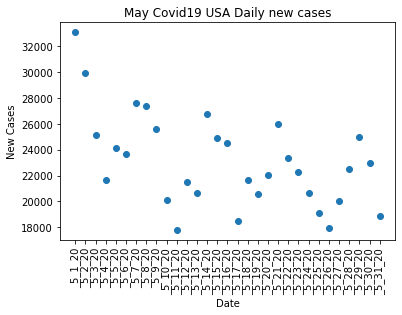

In [21]:
date = all_us_daily['date']
cases = all_us_daily['cases']

plt.plot(date, cases, 'o')
plt.title('May Covid19 USA Daily new cases')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('New Cases')
plt.show()

In [26]:
by_state_daily['state'].values

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)